# NOTEBOOK 2: EXPLORATORY DATA ANALYSIS ON DIABETES DATA SET
### Team 3
- Anjali Sebastian
- Yesha Sharma
- Rupansh Phutela

### What this Notebook does?

- It fetches the csv file cleaned by Data_selection_cleaning Python File.
- We are going to convert into suitable datatypes and also drop unnecessary columns.
- We will get general idea of the data spread, shape and dispersion.
- To get more insights into the dataset, we will plot the following:-
 - Boxplots.
 - Histograms.
 - Scatter and Pair Plots.
 - Pearson Correlation factors.
 - Bar graph. 
 - Heatmap.

### 1. Import Packages 

In [1]:
# you need   Python ≥3.5 
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
##############################################

### 2. Read Data and Display

In [4]:
diabetes = pd.read_csv('./diabetes.csv')

In [5]:
diabetes.head()

,Unnamed: 0,Diabetes,BMI,State,HighBP,HighChol,CholCheck,FruitConsume,VegetableConsume,Smoker,...,NoDoctorDueToCost,PhysicalActivity,GeneralHealth,PhysicalHealth,MentalHealth,DifficultyWalking,Gender,Age,Education,Income
0,0,0.0,28.17,AL,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,3.0,15.0,0.0,1.0,0.0,13.0,3.0,3.0
1,1,0.0,18.54,AL,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,2.0,10.0,0.0,0.0,0.0,11.0,5.0,5.0
2,2,1.0,31.62,AL,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,3.0,0.0,30.0,1.0,0.0,10.0,6.0,7.0
3,6,1.0,32.98,AL,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,4.0,30.0,0.0,1.0,1.0,11.0,6.0,7.0
4,9,1.0,16.65,AL,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,20.0,0.0,1.0,0.0,11.0,2.0,3.0


In [6]:
#set datatypes of columns to boolean or categorical as appropriate
make_bool = ['Diabetes','HighBP','HighChol','CholCheck',\
             'FruitConsume','VegetableConsume','Smoker','HeavyDrinker','Stroke','HeartDisease',\
             'Healthcare','NoDoctorDueToCost','PhysicalActivity','DifficultyWalking','Gender']
make_categorical = ['GeneralHealth','Age','Education','Income']

In [7]:
#drop the extra index column in datafram
diabetes=diabetes.drop(['Unnamed: 0'], axis=1)

# we are converting categorical values to in and not type category since they are oridinal categorical. 
diabetes[make_categorical]=diabetes[make_categorical].astype('int64',errors='raise')

#set all boolean features
diabetes[make_bool]=diabetes[make_bool].astype('bool',errors='raise')

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243317 entries, 0 to 243316
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes           243317 non-null  bool   
 1   BMI                243317 non-null  float64
 2   State              243317 non-null  object 
 3   HighBP             243317 non-null  bool   
 4   HighChol           243317 non-null  bool   
 5   CholCheck          243317 non-null  bool   
 6   FruitConsume       243317 non-null  bool   
 7   VegetableConsume   243317 non-null  bool   
 8   Smoker             243317 non-null  bool   
 9   HeavyDrinker       243317 non-null  bool   
 10  Stroke             243317 non-null  bool   
 11  HeartDisease       243317 non-null  bool   
 12  Healthcare         243317 non-null  bool   
 13  NoDoctorDueToCost  243317 non-null  bool   
 14  PhysicalActivity   243317 non-null  bool   
 15  GeneralHealth      243317 non-null  int64  
 16  Ph

In [9]:
diabetes.head()

,Diabetes,BMI,State,HighBP,HighChol,CholCheck,FruitConsume,VegetableConsume,Smoker,HeavyDrinker,...,NoDoctorDueToCost,PhysicalActivity,GeneralHealth,PhysicalHealth,MentalHealth,DifficultyWalking,Gender,Age,Education,Income
0,False,28.17,AL,True,True,True,True,True,True,False,...,False,False,3,15.0,0.0,True,False,13,3,3
1,False,18.54,AL,False,False,True,True,True,False,False,...,False,True,2,10.0,0.0,False,False,11,5,5
2,True,31.62,AL,True,False,True,True,True,False,False,...,False,True,3,0.0,30.0,True,False,10,6,7
3,True,32.98,AL,False,False,True,True,True,True,False,...,False,True,4,30.0,0.0,True,True,11,6,7
4,True,16.65,AL,False,True,True,False,False,True,False,...,False,False,1,20.0,0.0,True,False,11,2,3


In [10]:
# null values check
print('null values in diabetes after pre-cleaning :\n',diabetes.isnull().sum(),'\n')

null values in diabetes after pre-cleaning :
 Diabetes             0
BMI                  0
State                0
HighBP               0
HighChol             0
CholCheck            0
FruitConsume         0
VegetableConsume     0
Smoker               0
HeavyDrinker         0
Stroke               0
HeartDisease         0
Healthcare           0
NoDoctorDueToCost    0
PhysicalActivity     0
GeneralHealth        0
PhysicalHealth       0
MentalHealth         0
DifficultyWalking    0
Gender               0
Age                  0
Education            0
Income               0
dtype: int64 



#### There are no null values since we have handled these already in previous notebook during data selection and cleaning

### 3. (a) Descriptive Analysis:  The mean, median, and standard deviation

In [11]:
# gather all columns of each type - Boolean, category, float, object
cols_boolean = diabetes.select_dtypes(include='bool').columns
print(cols_boolean)
cols_category = diabetes.select_dtypes(include='int64').columns
print(cols_category)
cols_float = diabetes.select_dtypes(include='float64').columns
print(cols_float)
cols_object = diabetes.select_dtypes(include='object').columns
print(cols_object)

Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'FruitConsume',
       'VegetableConsume', 'Smoker', 'HeavyDrinker', 'Stroke', 'HeartDisease',
       'Healthcare', 'NoDoctorDueToCost', 'PhysicalActivity',
       'DifficultyWalking', 'Gender'],
      dtype='object')
Index(['GeneralHealth', 'Age', 'Education', 'Income'], dtype='object')
Index(['BMI', 'PhysicalHealth', 'MentalHealth'], dtype='object')
Index(['State'], dtype='object')


In [12]:
diabetes.describe(include='float64')

,BMI,PhysicalHealth,MentalHealth
count,243317.000000,243317.000000,243317.000000
mean,28.673176,4.402426,3.673463
std,6.401627,8.831775,7.802452
min,12.000000,0.000000,0.000000
25%,24.340000,0.000000,0.000000
50%,27.460000,0.000000,0.000000
75%,31.870000,3.000000,3.000000
max,98.700000,30.000000,30.000000


- Mean of BMI - 28.673176
- Mean of PhysicalHealth - 4.402426
- Mean of MentalHealth - 3.673463
---
- Median of BMI - 27.460000
- Median of PhysicalHealth - 0
- Median of MentalHealth - 0
---
-  Standard Deviation of BMI - 6.401627
- Standard Deviation of PhysicalHealth - 8.831775
- Standard Deviation of MentalHealth - 7.802452


**Note: BMI of 98.7 seems very high we will look at boxplot and histogram to see if any outliers need to be removed** 

In [13]:
diabetes.describe(include=['int64'])

,GeneralHealth,Age,Education,Income
count,243317.000000,243317.000000,243317.000000,243317.000000
mean,3.439891,7.945277,5.073509,6.133201
std,1.060404,3.273054,0.974905,2.062683
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,6.000000,4.000000,5.000000
50%,4.000000,8.000000,5.000000,7.000000
75%,4.000000,10.000000,6.000000,8.000000
max,5.000000,13.000000,6.000000,8.000000


- Mean of GeneralHealth - 3.439891
- Mean of Age - 7.945277
- Mean of Education - 5.073509
- Mean of Income - 6.133201
---
- Median of GeneralHealth - 4
- Median of Age - 8
- Median of Education - 5
- Median of Income - 7
---
- Standard Deviation of GeneralHealth - 1.060404
- Standard Deviation of Age - 3.273054
- Standard Deviation of Education - 0.974905
- Standard Deviation of Income - 2.062683

In [14]:
diabetes.describe(include=['object'])

,State
count,243317
unique,52
top,MD
freq,10665


In [15]:
diabetes.describe(include=['bool'])

,Diabetes,HighBP,HighChol,CholCheck,FruitConsume,VegetableConsume,Smoker,HeavyDrinker,Stroke,HeartDisease,Healthcare,NoDoctorDueToCost,PhysicalActivity,DifficultyWalking,Gender
count,243317,243317,243317,243317,243317,243317,243317,243317,243317,243317,243317,243317,243317,243317,243317
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,True,True,True,False,False,False,False,True,False,True,False,False
freq,208018,139741,148839,234293,153361,199927,139605,228011,232711,220821,228085,220479,183214,202425,129062


In [16]:
#Verifying value counts of categorical columns
for col in cols_category:
    print('Value counts in',col,'col in listings :\n',diabetes[col].value_counts(),'\n')

Value counts in GeneralHealth col in listings :
 4    84200
3    75723
5    39314
2    32365
1    11715
Name: GeneralHealth, dtype: int64 

Value counts in Age col in listings :
 10    29388
9     29375
11    25957
8     25881
7     21022
13    17454
6     17305
12    17221
5     15318
4     14407
3     12120
2      9406
1      8463
Name: Age, dtype: int64 

Value counts in Education col in listings :
 6    104646
5     68338
4     57912
3      8565
2      3706
1       150
Name: Education, dtype: int64 

Value counts in Income col in listings :
 8    92737
7    40474
6    33153
5    23208
4    19561
3    14739
2    10234
1     9211
Name: Income, dtype: int64 



In [17]:
# Data Balance. Looking at what percentage of the data represents people with diabetes
diabetes['Diabetes'].value_counts()

False    208018
True      35299
Name: Diabetes, dtype: int64

In [18]:
diabetes['Diabetes'].value_counts()/diabetes.shape[0]

False    0.854926
True     0.145074
Name: Diabetes, dtype: float64

**Note: We can see that 14% of the dataset represents those with diabetes. This is the minority class. Going ahead we will have to either oversample the minority class or undersample the majority class for machine learning.**


**Incidence of Diabetes in our dataset is slighly higher than national average data. According to CDC data 1 in 10 Americans(10%) have diabetes vis-a-vis our dataset where it is 14%. This could be because the samples were only collected from those who are abve the age of 18.** 

### 4.  (b) Draw boxplots of attributes.

#### 4.1 Boxplots for all Numeric Features

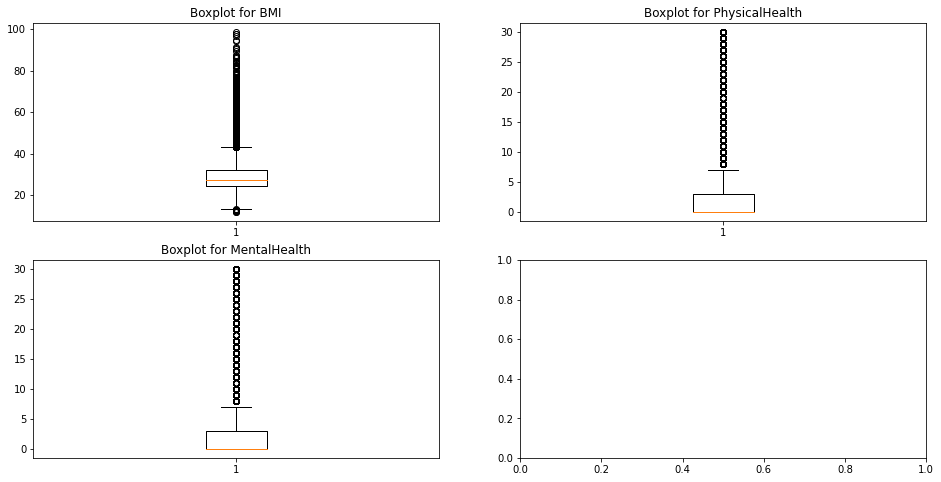

In [19]:
row = 2
cols = 2 
diabetes_float = diabetes[cols_float]
fig, ax = plt.subplots(row, cols, figsize=(16, 8))
for i in range(row):
    for j in range(cols):
        if(i*cols +j < len(diabetes_float.columns)):
            ax[i][j].boxplot(diabetes_float[diabetes_float.columns[i*cols +j]])

            ax[i][j].set_title("Boxplot for " + diabetes_float.columns[i*cols +j])

#### Boxplots' inference

**Note: Although we noticed that 98 BMI seemed very large. Looking at the boxplot we can see that there is a continous set of ouliers. These data points dont look like anomalies and therefore we are not removing any outlier from BMI.**

 - BMI - the Q1,Q2(median),Q3 are in expected range i.e. 22 to 25, minimum value = around 10, max value = approx 42 (except outliers)
 - Physical Health and Mental Health - They have a similar boxplot with values varying between 0 and 8, Q1,Q2,Q3 as 0,0,4(apx) and outliers from 8 to 30

#### 4.2 Boxplot for all Ordinal Categorical Features

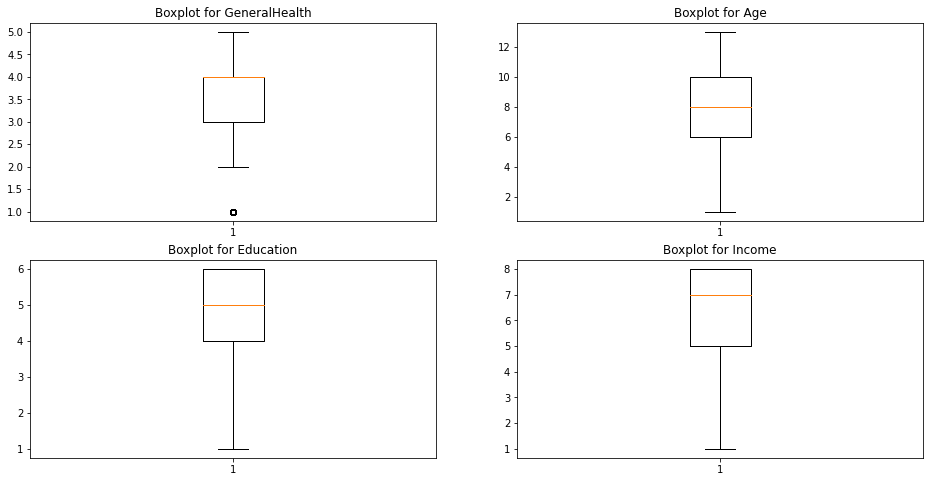

In [20]:
row = 2
cols = 2
diabetes_category = diabetes[cols_category]
fig, ax = plt.subplots(row, cols, figsize=(16, 8))
for i in range(row):
    for j in range(cols):
        if(i*cols +j < len(diabetes_category.columns)):
            ax[i][j].boxplot(diabetes_category[diabetes_category.columns[i*cols +j]])
            ax[i][j].set_title("Boxplot for " + diabetes_category.columns[i*cols +j])

**Note:** looking at the boxplot we see that the medians for 
- General Health: categry level = 4 which corresponds to Very good (5 is excellent 1 is poor)
- Age: category level = 8 which corresponds to those between 55 and 59 years 
- Education: category level = 5 which corresponds to "College 1 year to 3 years (Some college or technical school)"
- Income: category level = 7 which corresponds to income between 50,000 and  75,000 USD


#### 4.3 Boxplot for all Boolean Features

Text(0.5, 1.0, 'Boxplot for all Boolean Features')

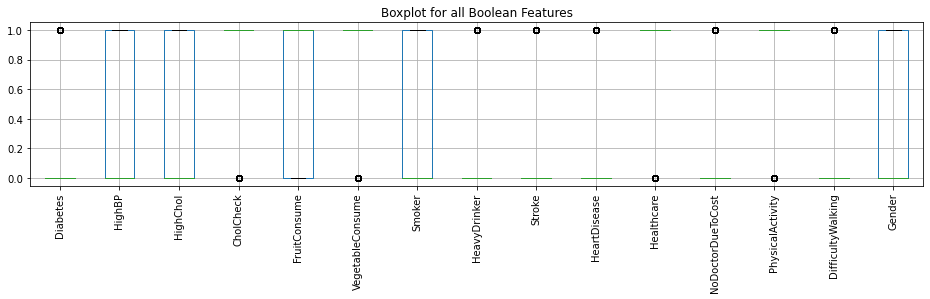

In [21]:
diabetes[cols_boolean].boxplot(figsize=(16,3), rot=90)
plt.title("Boxplot for all Boolean Features")

**Note: As these are boolean features the boxplot is not very informative. We can tell that features with spread box are more evenly balanced between 0 and 1 value. A bar plot would be more useful.** 

### 5. Histograms and Barplots

#### 5.1 Histograms for Numeric and Ordinal Categorical Features

Text(0.5, 1.0, 'Histograms for Numerical and Ordinal Categorical Features')

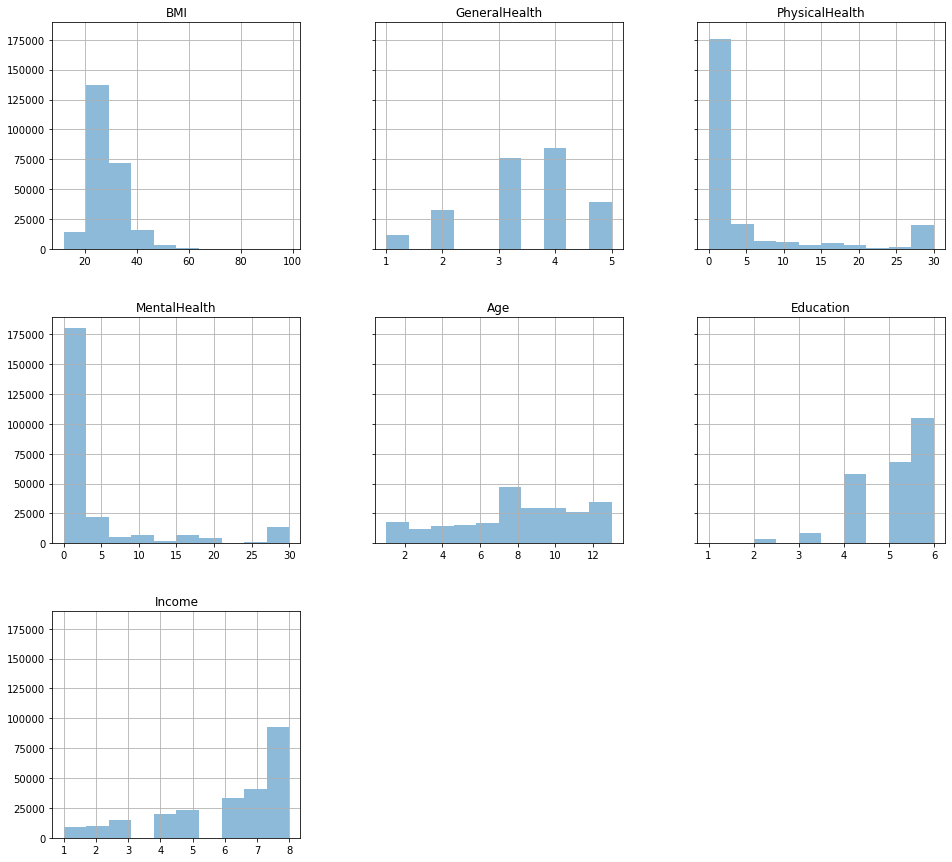

In [22]:
diabetes.hist(figsize=(16,15),alpha = 0.5,bins = 10, sharey=True)
plt.title("Histograms for Numerical and Ordinal Categorical Features")

#### Histograms' inference
As depicted by boxplot, histograms have the following characteristics:-
- BMI has more values between bins 10 to 50 . It is unimodal and is a near-bell curve.
- General Health has more values between bins 10 to 50. It is peaking at level 3 & 4 which is good to very good health.
- Physical and Mental health show unimodal curves with right skewed distribution.
- Age has a uniform distribution peaking between 7-8 i.e., between 50-60 years.
- Education is a left skewed unimodal curve peaking at 6 (College 4 years or more).
- Income is also left skewed peaking at 8 (greater than 75000 USD)

#### 5.2 Barplots for Boolean Features and Target  

In [23]:
diabetes_bool = diabetes[cols_boolean]
boolean_percent = diabetes['Diabetes'].value_counts().to_frame()/diabetes.shape[0]

for col in diabetes_bool.columns:
    if(col!='Diabetes'):
        mini = diabetes[col].value_counts().to_frame()/diabetes.shape[0]
        boolean_percent = pd.concat([boolean_percent, mini], axis=1, ignore_index=True)

boolean_percent.columns = [cols_boolean]        
boolean_percent

,Diabetes,HighBP,HighChol,CholCheck,FruitConsume,VegetableConsume,Smoker,HeavyDrinker,Stroke,HeartDisease,Healthcare,NoDoctorDueToCost,PhysicalActivity,DifficultyWalking,Gender
False,0.854926,0.574317,0.611708,0.037087,0.369707,0.178327,0.573758,0.937094,0.956411,0.907544,0.062601,0.906139,0.247015,0.831939,0.530427
True,0.145074,0.425683,0.388292,0.962913,0.630293,0.821673,0.426242,0.062906,0.043589,0.092456,0.937399,0.093861,0.752985,0.168061,0.469573


Text(0.5, 1.0, 'Percentage 0 or 1 responses to Boolean Features )')

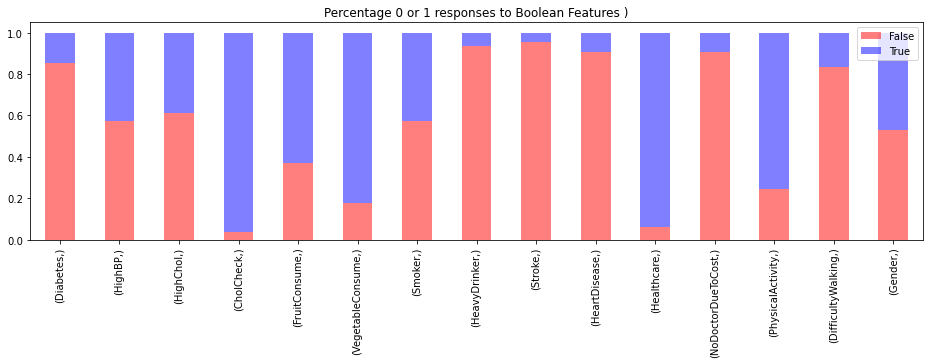

In [24]:
boolean_percent = boolean_percent.transpose()
boolean_percent.plot(kind='bar',color=['red', 'blue'],stacked = True, alpha =0.5,figsize=(16,4), rot=90)
plt.title("Percentage 0 or 1 responses to Boolean Features )")

- This shows the data balance between various boolean variables.
- On a generalization perspective, dataset is balanced by the gender ratio.
- As highlighted earlier, diabeletes (target for classification) is imbalanced.

#### 5.3 Data Distribution across Different States

<AxesSubplot:>

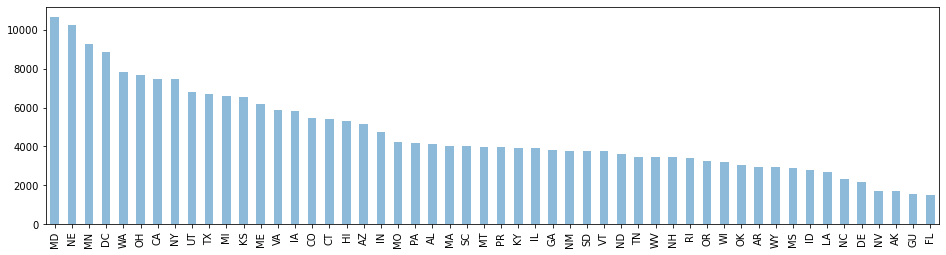

In [25]:
diabetes['State'].value_counts().plot(kind='bar', alpha =0.5,figsize=(16,4), rot=90)

### 6. (c) Draw Pairplots
- For example, you can use   import seaborn as sns;and then use  sns.pairplot()

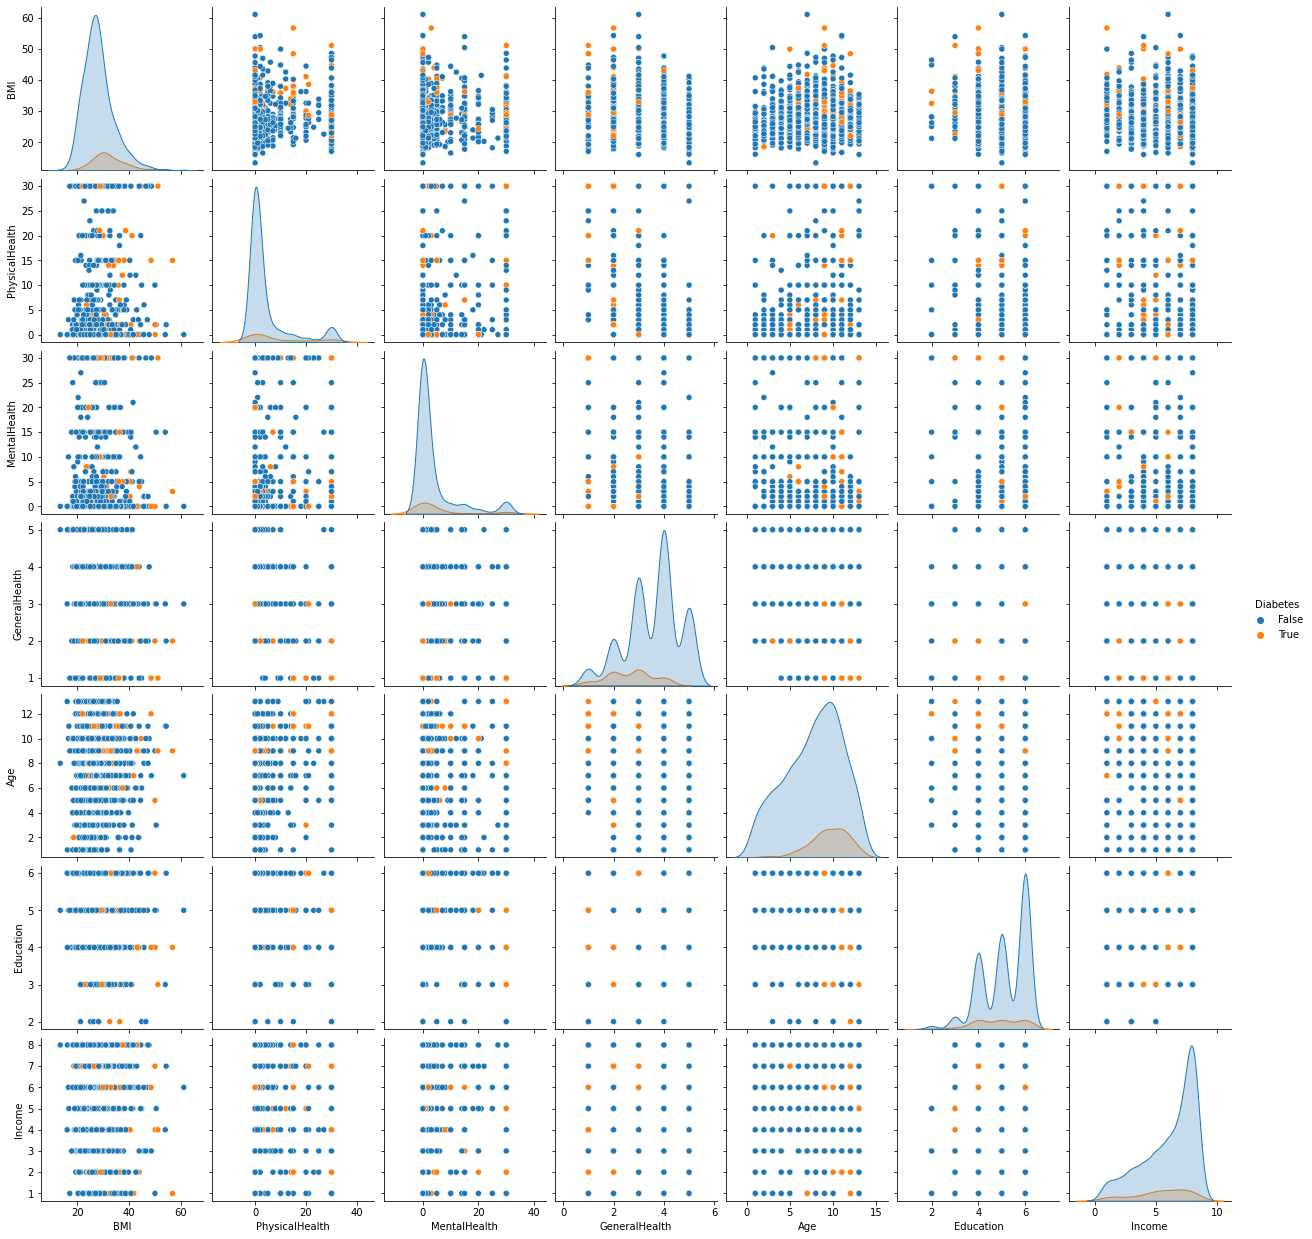

In [26]:
# trying different color schemes
palette = sns.color_palette("bright")

# creating list of all floats and categorical value + the target
sns_list = cols_float.tolist() + cols_category.tolist() + ['Diabetes']

#sampling a random number of values since plotting all 0.2 million datapoints will make the plot unreadable
number_of_samples = 1000
diabetes_sample = diabetes.sample(number_of_samples)
df_plot =diabetes_sample[sns_list]
sns.pairplot(df_plot, hue='Diabetes', plot_kws={'alpha':1})

#### Pairplots' inference
- Since we have 23 data columns, we are selecting only a subset of columns as pairplots that ordinal or of float type.
- Additionally to reduce computation time we are randomly sampling only 1000 rows for the total (0.2 million+) data frame. This makes the plots clearer to see as well 
- From the scatter plots, there isn't an appropriate correlation visible with the naked eye
- Hence, we will make a heatmap and also find correlation among all the columns

### 7.  (d) If the scatter plot shows a correlation among variables, then calculate the correlation.  We can use the following command for this purpose.


In [27]:
diabetes.corr()

,Diabetes,BMI,HighBP,HighChol,CholCheck,FruitConsume,VegetableConsume,Smoker,HeavyDrinker,Stroke,...,NoDoctorDueToCost,PhysicalActivity,GeneralHealth,PhysicalHealth,MentalHealth,DifficultyWalking,Gender,Age,Education,Income
Diabetes,1.000000,0.214406,0.264480,0.206304,0.068309,-0.029148,-0.039670,0.057439,-0.061356,0.111758,...,0.018799,-0.122594,-0.284712,0.173316,0.053553,0.216740,0.030739,0.193115,-0.110472,-0.149129
BMI,0.214406,1.000000,0.220077,0.102515,0.034871,-0.087788,-0.046691,0.013430,-0.040612,0.017064,...,0.047957,-0.143925,-0.250105,0.123211,0.083946,0.197330,0.017796,-0.029011,-0.094184,-0.080907
HighBP,0.264480,0.220077,1.000000,0.303605,0.100565,-0.026848,-0.033193,0.098756,-0.005050,0.135123,...,-0.001732,-0.113580,-0.280748,0.159268,0.038884,0.222005,0.056070,0.349149,-0.107000,-0.136702
HighChol,0.206304,0.102515,0.303605,1.000000,0.095806,-0.025939,-0.021524,0.086088,-0.013900,0.097751,...,-0.001932,-0.068055,-0.194416,0.122674,0.042723,0.145126,0.022587,0.286603,-0.036451,-0.057267
CholCheck,0.068309,0.034871,0.100565,0.095806,1.000000,0.032427,0.018282,-0.016649,-0.031740,0.027305,...,-0.080688,0.012704,-0.033767,0.030213,-0.017127,0.044470,-0.043166,0.107531,0.030458,0.024746
FruitConsume,-0.029148,-0.087788,-0.026848,-0.025939,0.032427,1.000000,0.218223,-0.075698,-0.038302,-0.003581,...,-0.043225,0.123372,0.094812,-0.045607,-0.075855,-0.037295,-0.058908,0.083583,0.097824,0.070095
VegetableConsume,-0.039670,-0.046691,-0.033193,-0.021524,0.018282,0.218223,1.000000,-0.011862,0.014879,-0.023225,...,-0.033074,0.127687,0.107386,-0.055045,-0.055464,-0.065750,-0.053810,0.022613,0.133771,0.146915
Smoker,0.057439,0.013430,0.098756,0.086088,-0.016649,-0.075698,-0.011862,1.000000,0.102515,0.061635,...,0.055440,-0.079384,-0.172702,0.122506,0.099937,0.121155,0.085604,0.117582,-0.167054,-0.126273
HeavyDrinker,-0.061356,-0.040612,-0.005050,-0.013900,-0.031740,-0.038302,0.014879,0.102515,1.000000,-0.021902,...,0.016157,0.014397,0.024280,-0.020779,0.035766,-0.036412,0.006503,-0.052640,0.014218,0.046114
Stroke,0.111758,0.017064,0.135123,0.097751,0.027305,-0.003581,-0.023225,0.061635,-0.021902,1.000000,...,0.025504,-0.072490,-0.173373,0.146217,0.066105,0.180473,0.005716,0.131658,-0.066517,-0.125590


#### Plotting a sns heatmap for better clarity

<AxesSubplot:>

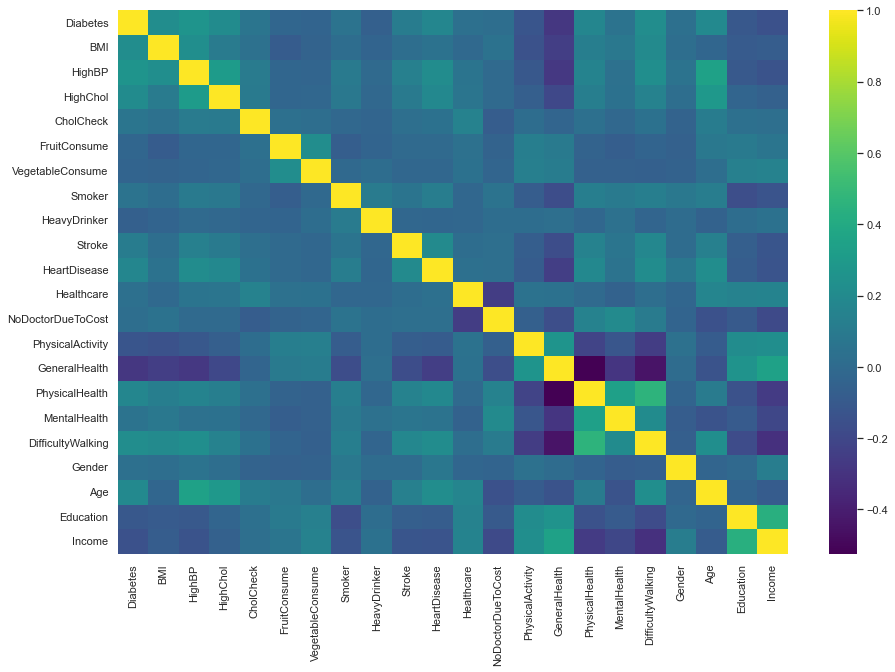

In [28]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(diabetes.corr(), annot=False, vmax=1, cmap='viridis', square=False)

#### Correlations' and heatmap's inference
- BMI has a certain degree of correlation with Diabetes, High BP, Physical,Mental Health & Difficulty walking.
- Diabetes has a certain degree of correlation with BMI, High BP, High Chol, Smoker, Stroke, Heart Disease, Physical Health & Difficulty walking.
- Surprisingly, Physical Health, Mental health and Difficulty Walking are correlated. 
- General Health and Vegetable & Fruit Consumption is moderately correlated.
- No parameter has very high degree of correlation(yellow).

#### Plotting the high correlation scatter plots

Text(0, 0.5, 'Diabetes')

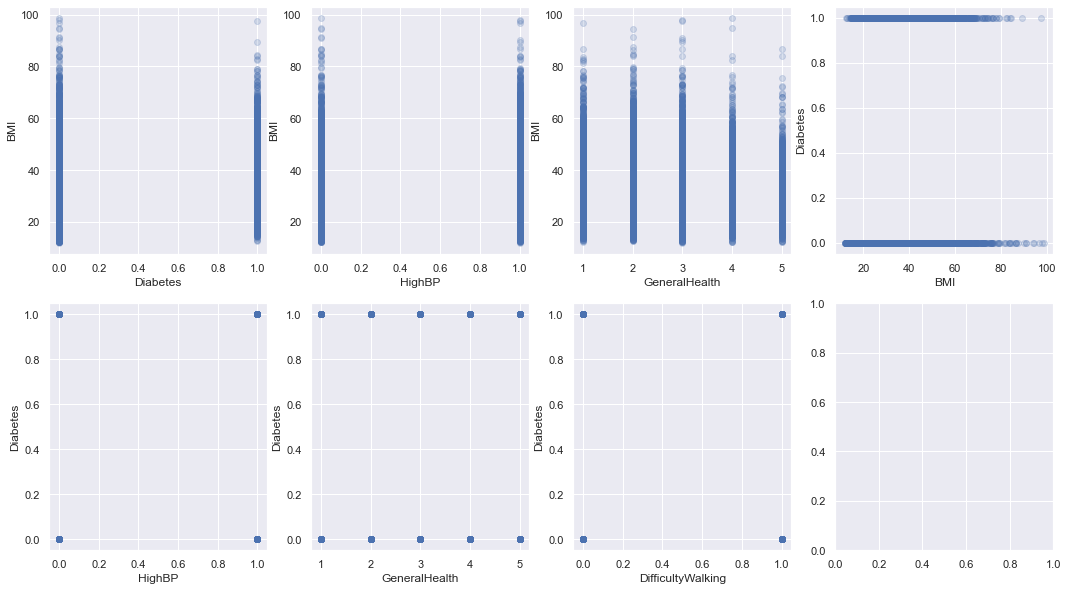

In [29]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4, figsize=[18,10])
ax1.scatter (x=diabetes['Diabetes'] ,y=diabetes['BMI'], alpha=0.2)
ax1.set_xlabel('Diabetes')
ax1.set_ylabel('BMI')
ax2.scatter (x=diabetes['HighBP'] ,y=diabetes['BMI'],alpha=0.2)
ax2.set_xlabel('HighBP')
ax2.set_ylabel('BMI')
ax3.scatter (x=diabetes['GeneralHealth'] ,y=diabetes['BMI'],alpha=0.2)
ax3.set_xlabel('GeneralHealth')
ax3.set_ylabel('BMI')
ax4.scatter (x=diabetes['BMI'] ,y=diabetes['Diabetes'],alpha=0.2)
ax4.set_xlabel('BMI')
ax4.set_ylabel('Diabetes')
ax5.scatter (x=diabetes['HighBP'] ,y=diabetes['Diabetes'],alpha=0.2)
ax5.set_xlabel('HighBP')
ax5.set_ylabel('Diabetes')
ax6.scatter (x=diabetes['GeneralHealth'] ,y=diabetes['Diabetes'],alpha=0.2)
ax6.set_xlabel('GeneralHealth')
ax6.set_ylabel('Diabetes')
ax7.scatter (x=diabetes['DifficultyWalking'] ,y=diabetes['Diabetes'],alpha=0.2)
ax7.set_xlabel('DifficultyWalking')
ax7.set_ylabel('Diabetes')

# Conclusion
- We converted certain features to boolean which had only True/False values, few as cateogircal (having more than 2 categories). We also dropped the first column which was a duplicate for already existing index.
- We displayed general data shape,spread and dispersion with head, tail, shape and info.
- We displayed the descriptive statistics for bool, categorical, integer features.
- To get more insights into the dataset, we have plotted the following:-
 - Boxplots for different quartiles and outliers.
 - Histograms for data modality and frequencies.
 - Scatter and Pair Plots to get relationship between each set of 2 variables.
 - Pearson Correlation factors to get get r-value between each set of 2 variables.
 - Bar graph to show data distribution among variables features.
 - Heatmap displaying the correlation visually. 
- Highly correlated features do not show any linear correlation on the scatter plots so we might see some degree of correlation in Decision Trees and Random Forests. Also, a reason for this is the prominence of categorical & boolean variables over continuous(numerical) variables.

**Note : Please refer to individual sections for detailed summaries and inferences**